**Fecha: 30 de abril de 2025**

# 1. Gráfica 'datosECs':

Gráfica del espectro de fotones γ, cálculo número total de fotones

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


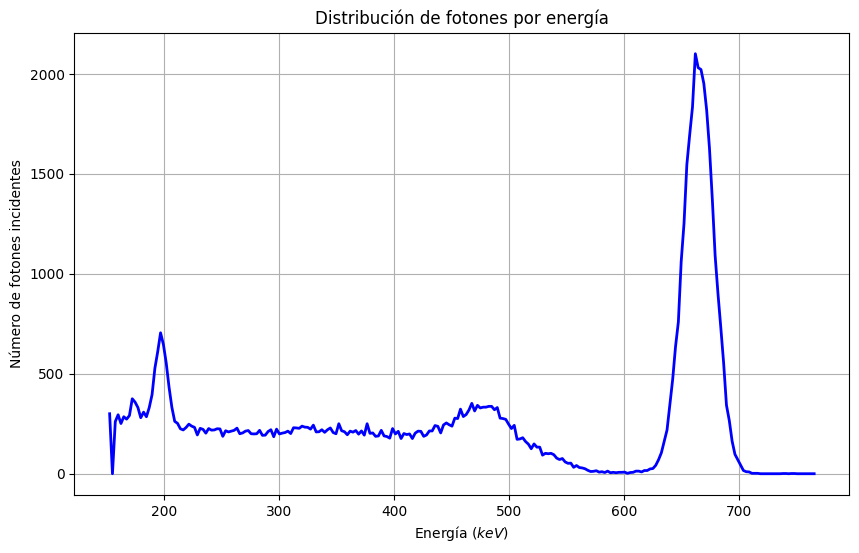

Número total de fotones: 66365.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Semestre 2025-I/Física avanzada de radiaciones/Trabajo en clase 2: Espectros rayos gamma/Datos (.txt)'

filename = 'datosECs.txt'
file_path = os.path.join(folder_path, filename)
data = np.loadtxt(file_path)
energia = data[:, 0]
num_fotones = data[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(energia, num_fotones, 'b-', linewidth=2)
plt.title('Distribución de fotones por energía')
plt.xlabel('Energía ($keV$)')
plt.ylabel('Número de fotones incidentes')
plt.grid(True)
plt.show()

total_fotones = np.sum(num_fotones)
print(f"Número total de fotones: {total_fotones}")

Cálculo del área en el borde Compton

<ipython-input-15-0bd234e410d4>:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AreaCompton = np.trapz(fotones_rango, energia_rango)
<ipython-input-15-0bd234e410d4>:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_fotones = np.trapz(num_fotones, energia)
<ipython-input-15-0bd234e410d4>:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AreaCompton_s = np.trapz(fotones_rango_s, energia_rango)
<ipython-input-15-0bd234e410d4>:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_fotones = np.trapz(fotones_suavizados, energia)



LÍMITES DE INTEGRACIÓN:
- Límite inferior: 184.74000 keV (más cercano a 184.5 keV)
- Límite superior: 477.48000 keV (más cercano a 477.65 keV)
RESULTADOS:
- Fotones en el intervalo: 7.1697e+04
- Porcentaje del total: 44.02%
---- Con el algoritmo de suavizado del espectro ----
- Fotones en el intervalo: 7.1715e+04
- Porcentaje del total: 44.02%



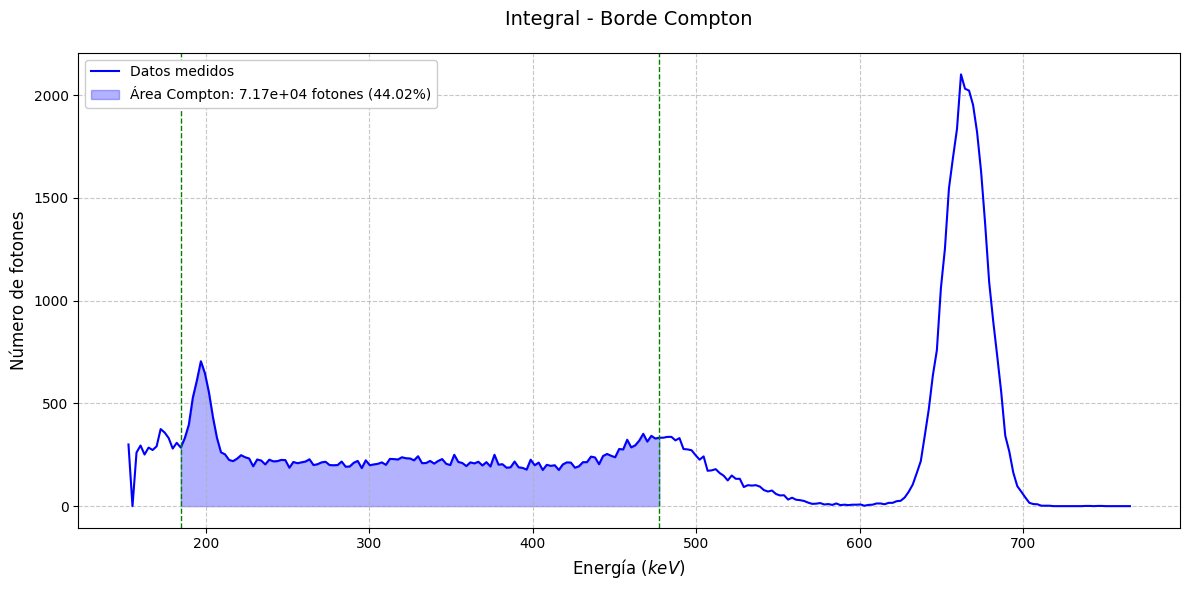

In [ ]:
#Límites de integración:
lim_inf = 184.5
lim_sup = 477.65
idx_inf = np.abs(energia - lim_inf).argmin()
idx_sup = np.abs(energia - lim_sup).argmin()
if idx_inf > idx_sup:
    idx_inf, idx_sup = idx_sup, idx_inf
energia_rango = energia[idx_inf:idx_sup+1]
fotones_rango = num_fotones[idx_inf:idx_sup+1]

#Algoritmo de suavizado:
window_length = 11
polyorder = 4
fotones_suavizados = savgol_filter(num_fotones, window_length, polyorder)
fotones_rango_s = fotones_suavizados[idx_inf:idx_sup+1]

#Integración:
AreaCompton = np.trapz(fotones_rango, energia_rango)
total_fotones = np.trapz(num_fotones, energia)
porcentaje = (AreaCompton / total_fotones) * 100

AreaCompton_s = np.trapz(fotones_rango_s, energia_rango)
total_fotones = np.trapz(fotones_suavizados, energia)
porcentaje_s = (AreaCompton_s / total_fotones) * 100

#Mostrar resultados:
print("\n" + "="*51)
print("LÍMITES DE INTEGRACIÓN:")
print(f"- Límite inferior: {energia[idx_inf]:.5f} keV (más cercano a {lim_inf} keV)")
print(f"- Límite superior: {energia[idx_sup]:.5f} keV (más cercano a {lim_sup} keV)")
print("RESULTADOS:")
print(f"- Fotones en el intervalo: {AreaCompton:.4e}")
print(f"- Porcentaje del total: {porcentaje:.2f}%")
print("---- Con el algoritmo de suavizado del espectro ----")
print(f"- Fotones en el intervalo: {AreaCompton_s:.4e}")
print(f"- Porcentaje del total: {porcentaje_s:.2f}%")
print("\n" + "="*51)

#Graficar:
plt.figure(figsize=(12, 6))
plt.plot(energia, num_fotones, 'b-', linewidth=1.5, label='Datos medidos')
plt.fill_between(energia_rango, fotones_rango, color='blue', alpha=0.3,
                label=f'Área Compton: {AreaCompton:.2e} fotones ({porcentaje:.2f}%)')
plt.axvline(energia[idx_inf], color='green', linestyle='--', linewidth=1)
plt.axvline(energia[idx_sup], color='green', linestyle='--', linewidth=1)
plt.title('Integral - Borde Compton', fontsize=14, pad=20)
plt.xlabel('Energía ($keV$)', fontsize=12)
plt.ylabel('Número de fotones', fontsize=12)
plt.legend(fontsize=10, framealpha=1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Cálculo del área en el fotopico

<ipython-input-12-f80f7581df01>:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AreaFoto = np.trapz(fotones_rango, energia_rango)
<ipython-input-12-f80f7581df01>:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_fotones = np.trapz(fotones_suavizados, energia)
<ipython-input-12-f80f7581df01>:73: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AreaGauss = np.trapz(fotones_gauss, energia_gauss)



RESULTADOS:
---- Primer método (Integración directa) ----
- Límite inferior: 622.62000 keV (más cercano a 623 keV)
- Límite superior: 701.34000 keV (más cercano a 701 keV)
- Fotones en el intervalo: 6.7399e+04
- Porcentaje del total: 41.37%
---- Segundo método (Integración gaussiana) ----
- Centro del pico (μ): 664.96 ± 0.06 eV
- Ancho (σ): 13.05 ± 0.06 keV
- Límite inferior (±3σ): 625.81 keV
- Límite superior (±3σ): 704.12 keV
- Fotones en el intervalo gaussiano: 6.7336e+04
- Porcentaje del total: 41.34%



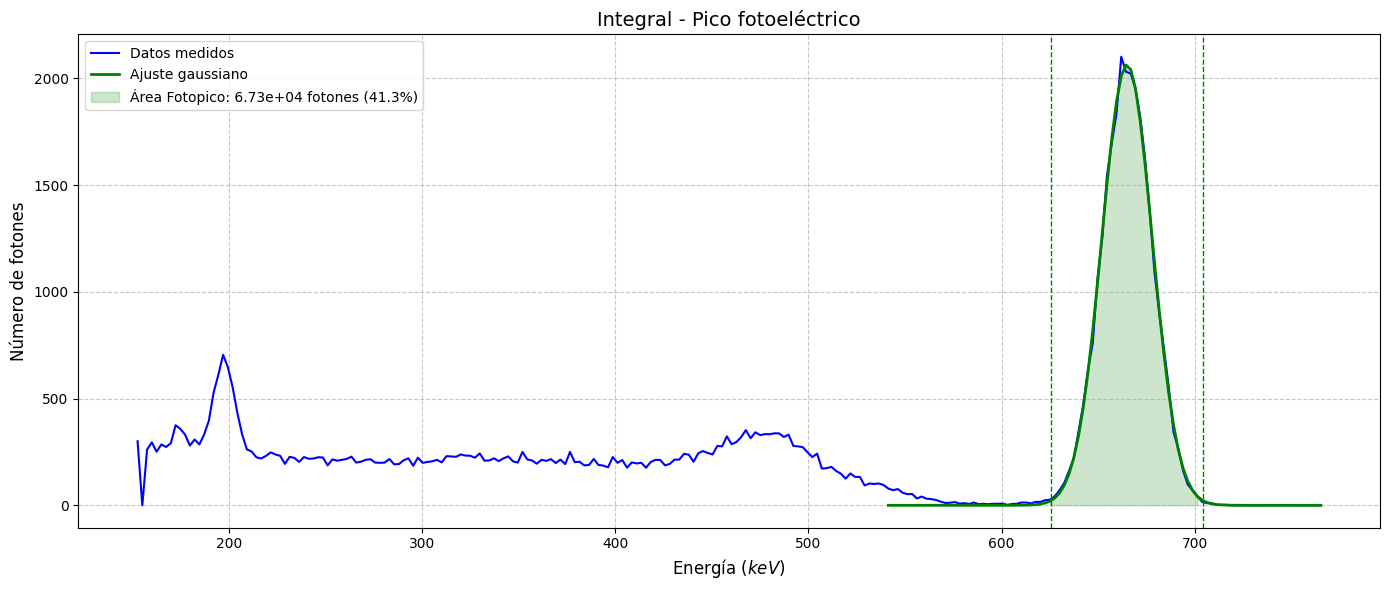

In [ ]:
#PRIMER MÉTODO: POR INTEGRACIÓN DIRECTA

#Límites de integración:
lim_inf = 623
lim_sup = 701
idx_inf = np.abs(energia - lim_inf).argmin()
idx_sup = np.abs(energia - lim_sup).argmin()
if idx_inf > idx_sup:
    idx_inf, idx_sup = idx_sup, idx_inf
energia_rango = energia[idx_inf:idx_sup+1]
fotones_rango = num_fotones[idx_inf:idx_sup+1]

#Integración:
AreaFoto = np.trapz(fotones_rango, energia_rango)
total_fotones = np.trapz(fotones_suavizados, energia)
porcentaje = (AreaFoto / total_fotones) * 100

#SEGUNDO MÉTODO: APROXIMACIÓN GAUSSIANA

from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#Algoritmo suavizado:
window_length = 11
polyorder = 4
fotones_suavizados = savgol_filter(num_fotones, window_length, polyorder)

#Algoritmo de detección del pico:
peaks, _ = find_peaks(fotones_suavizados, height=np.max(fotones_suavizados)*0.1, distance=20)
peak_index = peaks[np.argmax(fotones_suavizados[peaks])]
peak_energy = energia[peak_index]

#Función gaussiana:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

#Ajustar la gaussiana alrededor del pico:
fit_window = 50
idx_inf_fit = max(0, peak_index - fit_window)
idx_sup_fit = min(len(energia), peak_index + fit_window)
x_fit = energia[idx_inf_fit:idx_sup_fit]
y_fit = fotones_suavizados[idx_inf_fit:idx_sup_fit]

#Parámetros iniciales:
p0 = [np.max(y_fit), peak_energy, 10]
params, cov = curve_fit(gaussian, x_fit, y_fit, p0=p0)
A, mu, sigma = params
A_err, mu_err, sigma_err = np.sqrt(np.diag(cov))

#Intervalo de integración:
lim_inf_gauss = mu - 3*sigma
lim_sup_gauss = mu + 3*sigma
idx_inf_gauss = np.abs(energia - lim_inf_gauss).argmin()
idx_sup_gauss = np.abs(energia - lim_sup_gauss).argmin()
energia_gauss = energia[idx_inf_gauss:idx_sup_gauss]
fotones_gauss = fotones_suavizados[idx_inf_gauss:idx_sup_gauss]

#Integración gaussiana:
AreaGauss = np.trapz(fotones_gauss, energia_gauss)
porcentaje_gauss = (AreaGauss / total_fotones) * 100

#Resultados y gráfica:
print("\n" + "="*51)
print("RESULTADOS:")
print("---- Primer método (Integración directa) ----")
print(f"- Límite inferior: {energia[idx_inf]:.5f} keV")
print(f"- Límite superior: {energia[idx_sup]:.5f} keV")
print(f"- Fotones en el intervalo: {AreaFoto:.4e}")
print(f"- Porcentaje del total: {porcentaje:.2f}%")
print("---- Segundo método (Integración gaussiana) ----")
print(f"- Centro del pico (μ): {mu:.2f} ± {mu_err:.2f} eV")
print(f"- Ancho (σ): {sigma:.2f} ± {sigma_err:.2f} keV")
print(f"- Límite inferior (±3σ): {lim_inf_gauss:.2f} keV")
print(f"- Límite superior (±3σ): {lim_sup_gauss:.2f} keV")
print(f"- Fotones en el intervalo gaussiano: {AreaGauss:.4e}")
print(f"- Porcentaje del total: {porcentaje_gauss:.2f}%")
print("="*51 + "\n")

plt.figure(figsize=(14, 6))
plt.plot(energia, num_fotones, 'b-', linewidth=1.5, label='Datos medidos')
plt.plot(x_fit, gaussian(x_fit, *params), 'g-', linewidth=2, label='Ajuste gaussiano')
plt.fill_between(energia_gauss, fotones_gauss, color='green', alpha=0.2,
                label=f'Área Fotopico: {AreaGauss:.2e} fotones ({porcentaje_gauss:.1f}%)')

plt.axvline(lim_inf_gauss, color='green', linestyle='--', linewidth=1)
plt.axvline(lim_sup_gauss, color='green', linestyle='--', linewidth=1)

plt.title('Integral - Pico fotoeléctrico', fontsize=14)
plt.xlabel('Energía ($keV$)', fontsize=12)
plt.ylabel('Número de fotones', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
AreaTotal = AreaCompton + AreaFoto
AreaTotal_s = AreaCompton_s + AreaGauss
print(f"Área total por integración directa (Compton y Fotoeléctrico): {AreaTotal:.4e}")
print(f"Área total con ajustes (Compton y Fotoeléctrico): {AreaTotal_s:.4e}")

Área total por integración directa (Compton y Fotoeléctrico): 1.3910e+05
Área total con ajustes (Compton y Fotoeléctrico): 1.3905e+05


In [ ]:
PorcentajeCompton = (AreaCompton / AreaTotal) * 100
PorcentajeFoto = (AreaFoto / AreaTotal) * 100
PorcentajeCompton_s = (AreaCompton_s / AreaTotal_s) * 100
PorcentajeFoto_s = (AreaGauss / AreaTotal_s) * 100

print(f"Porcentaje de Compton - Integración directa: {PorcentajeCompton:.2f}%")
print(f"Porcentaje de Fotoeléctrico - Integración directa: {PorcentajeFoto:.2f}%")
print(f"Porcentaje de Compton - Algoritmo de suavizado: {PorcentajeCompton_s:.2f}%")
print(f"Porcentaje de Fotoeléctrico - Ajuste gaussiano: {PorcentajeFoto_s:.2f}%")

Porcentaje de Compton - Integración directa: 51.54%
Porcentaje de Fotoeléctrico - Integración directa: 48.46%
Porcentaje de Compton - Algoritmo de suavizado: 51.57%
Porcentaje de Fotoeléctrico - Ajuste gaussiano: 48.43%


# 2. Atenuación exponencial:

Importación de los datos del espectro con diferentes espesores de atenuación

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


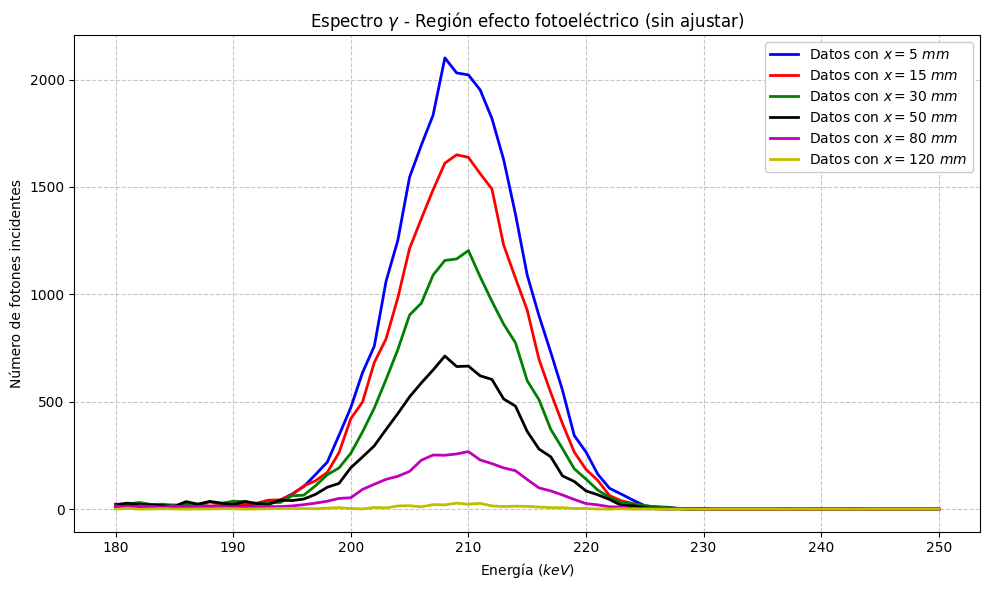

Número total de fotones (a 5mm): 66382.0
Número total de fotones (a 15mm): 57470.0
Número total de fotones (a 30mm): 46945.0
Número total de fotones (a 50mm): 31774.0
Número total de fotones (a 80mm): 13927.0
Número total de fotones (a 120mm): 1749.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Semestre 2025-I/Física avanzada de radiaciones/Trabajo en clase 2: Espectros rayos gamma/Datos (.txt)'

#Datos:
filename_5mm = '5mm'
file_path_5mm = os.path.join(folder_path, filename_5mm)
data_5mm = np.loadtxt(file_path_5mm)
energia_5mm = data_5mm[50:, 0]
num_fotones_5mm = data_5mm[50:, 1]

filename_15mm = '15mm'
file_path_15mm = os.path.join(folder_path, filename_15mm)
data_15mm = np.loadtxt(file_path_15mm)
energia_15mm = data_15mm[50:, 0]
num_fotones_15mm = data_15mm[50:, 1]

filename_30mm = '30mm'
file_path_30mm = os.path.join(folder_path, filename_30mm)
data_30mm = np.loadtxt(file_path_30mm)
energia_30mm = data_30mm[50:, 0]
num_fotones_30mm = data_30mm[50:, 1]

filename_50mm = '50mm'
file_path_50mm = os.path.join(folder_path, filename_50mm)
data_50mm = np.loadtxt(file_path_50mm)
energia_50mm = data_50mm[50:, 0]
num_fotones_50mm = data_50mm[50:, 1]

filename_80mm = '80mm'
file_path_80mm = os.path.join(folder_path, filename_80mm)
data_80mm = np.loadtxt(file_path_80mm)
energia_80mm = data_80mm[50:, 0]
num_fotones_80mm = data_80mm[50:, 1]

filename_120mm = '120mm'
file_path_120mm = os.path.join(folder_path, filename_120mm)
data_120mm = np.loadtxt(file_path_120mm)
energia_120mm = data_120mm[50:, 0]
num_fotones_120mm = data_120mm[50:, 1]


#Límites:
lim_inf = 180
lim_sup = 250

idx_inf_5mm = np.abs(energia_5mm - lim_inf).argmin()
idx_sup_5mm = np.abs(energia_5mm - lim_sup).argmin()
if idx_inf_5mm > idx_sup_5mm:
    idx_inf_5mm, idx_sup_5mm = idx_sup_5mm, idx_inf_5mm

idx_inf_15mm = np.abs(energia_15mm - lim_inf).argmin()
idx_sup_15mm = np.abs(energia_15mm - lim_sup).argmin()
if idx_inf_15mm > idx_sup_15mm:
    idx_inf_15mm, idx_sup_15mm = idx_sup_15mm, idx_inf_15mm

idx_inf_30mm = np.abs(energia_30mm - lim_inf).argmin()
idx_sup_30mm = np.abs(energia_30mm - lim_sup).argmin()
if idx_inf_30mm > idx_sup_30mm:
    idx_inf_30mm, idx_sup_30mm = idx_sup_30mm, idx_inf_30mm

idx_inf_50mm = np.abs(energia_50mm - lim_inf).argmin()
idx_sup_50mm = np.abs(energia_50mm - lim_sup).argmin()
if idx_inf_50mm > idx_sup_50mm:
    idx_inf_50mm, idx_sup_50mm = idx_sup_50mm, idx_inf_50mm

idx_inf_80mm = np.abs(energia_80mm - lim_inf).argmin()
idx_sup_80mm = np.abs(energia_80mm - lim_sup).argmin()
if idx_inf_80mm > idx_sup_80mm:
    idx_inf_80mm, idx_sup_80mm = idx_sup_80mm, idx_inf_80mm

idx_inf_120mm = np.abs(energia_120mm - lim_inf).argmin()
idx_sup_120mm = np.abs(energia_120mm - lim_sup).argmin()
if idx_inf_120mm > idx_sup_120mm:
    idx_inf_120mm, idx_sup_120mm = idx_sup_120mm, idx_inf_120mm

#Selección del rango de datos:
energia_rango_5mm = energia_5mm[idx_inf_5mm:idx_sup_5mm+1]
fotones_rango_5mm = num_fotones_5mm[idx_inf_5mm:idx_sup_5mm+1]

energia_rango_15mm = energia_15mm[idx_inf_15mm:idx_sup_15mm+1]
fotones_rango_15mm = num_fotones_15mm[idx_inf_15mm:idx_sup_15mm+1]

energia_rango_30mm = energia_30mm[idx_inf_30mm:idx_sup_30mm+1]
fotones_rango_30mm = num_fotones_30mm[idx_inf_30mm:idx_sup_30mm+1]

energia_rango_50mm = energia_50mm[idx_inf_50mm:idx_sup_50mm+1]
fotones_rango_50mm = num_fotones_50mm[idx_inf_50mm:idx_sup_50mm+1]

energia_rango_80mm = energia_80mm[idx_inf_80mm:idx_sup_80mm+1]
fotones_rango_80mm = num_fotones_80mm[idx_inf_80mm:idx_sup_80mm+1]

energia_rango_120mm = energia_120mm[idx_inf_120mm:idx_sup_120mm+1]
fotones_rango_120mm = num_fotones_120mm[idx_inf_120mm:idx_sup_120mm+1]

#Resultados y gráficas:
plt.figure(figsize=(10, 6))
plt.plot(energia_rango_5mm, fotones_rango_5mm, 'b-', linewidth=2, label='Datos con $x =$5 $mm$')
plt.plot(energia_rango_15mm, fotones_rango_15mm, 'r-', linewidth=2, label='Datos con $x =$15 $mm$')
plt.plot(energia_rango_30mm, fotones_rango_30mm, 'g-', linewidth=2, label='Datos con $x =$30 $mm$')
plt.plot(energia_rango_50mm, fotones_rango_50mm, 'k-', linewidth=2, label='Datos con $x =$50 $mm$')
plt.plot(energia_rango_80mm, fotones_rango_80mm, 'm-', linewidth=2, label='Datos con $x =$80 $mm$')
plt.plot(energia_rango_120mm, fotones_rango_120mm, 'y-', linewidth=2, label='Datos con $x =$120 $mm$')
plt.title("Espectro $\gamma$ - Región efecto fotoeléctrico (sin ajustar)")
plt.xlabel('Energía ($keV$)')
plt.ylabel('Número de fotones incidentes')
plt.legend(fontsize=10, framealpha=1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Calculo suma total de fotones:
total_fotones_5mm = np.sum(data_5mm[:, 1])
print(f"Número total de fotones (a 5mm): {total_fotones_5mm}")
total_fotones_15mm = np.sum(data_15mm[:, 1])
print(f"Número total de fotones (a 15mm): {total_fotones_15mm}")
total_fotones_30mm = np.sum(data_30mm[:, 1])
print(f"Número total de fotones (a 30mm): {total_fotones_30mm}")
total_fotones_50mm = np.sum(data_50mm[:, 1])
print(f"Número total de fotones (a 50mm): {total_fotones_50mm}")
total_fotones_80mm = np.sum(data_80mm[:, 1])
print(f"Número total de fotones (a 80mm): {total_fotones_80mm}")
total_fotones_120mm = np.sum(data_120mm[:, 1])
print(f"Número total de fotones (a 120mm): {total_fotones_120mm}")

Realización del ajuste gaussiano para la obtención de la intensidad a diferentes atenuaciones

<ipython-input-35-2d86a991567e>:205: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AreaGauss_5mm = np.trapz(fotones_gauss_5mm, energia_gauss_5mm)
<ipython-input-35-2d86a991567e>:208: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AreaGauss_15mm = np.trapz(fotones_gauss_15mm, energia_gauss_15mm)
<ipython-input-35-2d86a991567e>:211: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AreaGauss_30mm = np.trapz(fotones_gauss_30mm, energia_gauss_30mm)
<ipython-input-35-2d86a991567e>:214: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  AreaGauss_50mm = np.trapz(fotones_gauss_50mm, energia_gauss_50mm)
<ipython-input-35-2d86a991567e>:217: De


---- INTEGRAL GAUSSIANA - PARA 5mm ----
- Centro del pico (μ): 209.21 ± 0.02 eV
- Ancho (σ): 5.31 ± 0.02 keV
- Límite inferior (±3σ): 193.29 keV
- Límite superior (±3σ): 225.13 keV
- Fotones en el intervalo gaussiano: 2.7372e+04
- Porcentaje del total: 41.23%
---------------------------------------------------

---- INTEGRAL GAUSSIANA - PARA 15mm ----
- Centro del pico (μ): 209.18 ± 0.03 eV
- Ancho (σ): 5.28 ± 0.03 keV
- Límite inferior (±3σ): 193.34 keV
- Límite superior (±3σ): 225.01 keV
- Fotones en el intervalo gaussiano: 2.1765e+04
- Porcentaje del total: 37.87%
---------------------------------------------------

---- INTEGRAL GAUSSIANA - PARA 30mm ----
- Centro del pico (μ): 209.02 ± 0.05 eV
- Ancho (σ): 5.29 ± 0.05 keV
- Límite inferior (±3σ): 193.15 keV
- Límite superior (±3σ): 224.89 keV
- Fotones en el intervalo gaussiano: 1.5516e+04
- Porcentaje del total: 33.05%
---------------------------------------------------

---- INTEGRAL GAUSSIANA - PARA 50mm ----
- Centro del pico

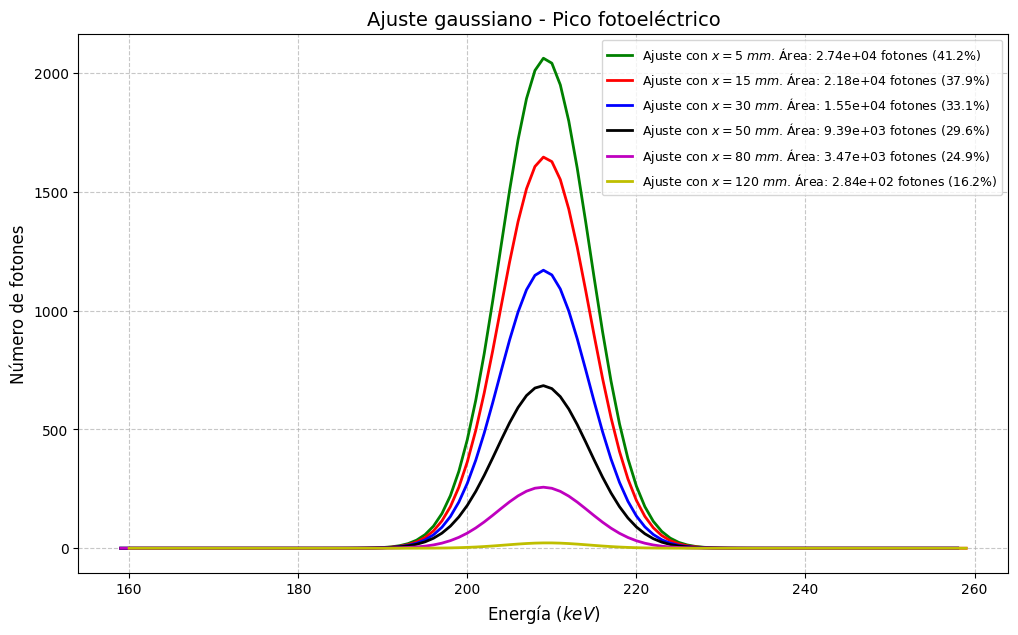

In [ ]:
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

#Algoritmo de suavizado:
window_length = 11
polyorder = 4
#Para 5mm:
fotones_suavizados_5mm = savgol_filter(num_fotones_5mm, window_length, polyorder)
#Para 15mm:
fotones_suavizados_15mm = savgol_filter(num_fotones_15mm, window_length, polyorder)
#Para 30mm:
fotones_suavizados_30mm = savgol_filter(num_fotones_30mm, window_length, polyorder)
#Para 50mm:
fotones_suavizados_50mm = savgol_filter(num_fotones_50mm, window_length, polyorder)
#Para 80mm:
fotones_suavizados_80mm = savgol_filter(num_fotones_80mm, window_length, polyorder)
#Para 120mm:
fotones_suavizados_120mm = savgol_filter(num_fotones_120mm, window_length, polyorder)


#Algoritmo de detección del pico:
#Para 5mm:
peaks_5mm, _ = find_peaks(fotones_suavizados_5mm, height=np.max(fotones_suavizados_5mm)*0.1, distance=20)
peak_index_5mm = peaks_5mm[np.argmax(fotones_suavizados_5mm[peaks_5mm])]
peak_energy_5mm = energia_5mm[peak_index_5mm]
#Para 15mm:
peaks_15mm, _ = find_peaks(fotones_suavizados_15mm, height=np.max(fotones_suavizados_15mm)*0.1, distance=20)
peak_index_15mm = peaks_15mm[np.argmax(fotones_suavizados_15mm[peaks_15mm])]
peak_energy_15mm = energia_15mm[peak_index_15mm]
#Para 30mm:
peaks_30mm, _ = find_peaks(fotones_suavizados_30mm, height=np.max(fotones_suavizados_30mm)*0.1, distance=20)
peak_index_30mm = peaks_30mm[np.argmax(fotones_suavizados_30mm[peaks_30mm])]
peak_energy_30mm = energia_30mm[peak_index_30mm]
#Para 50mm:
peaks_50mm, _ = find_peaks(fotones_suavizados_50mm, height=np.max(fotones_suavizados_50mm)*0.1, distance=20)
peak_index_50mm = peaks_50mm[np.argmax(fotones_suavizados_50mm[peaks_50mm])]
peak_energy_50mm = energia_50mm[peak_index_50mm]
#Para 80mm:
peaks_80mm, _ = find_peaks(fotones_suavizados_80mm, height=np.max(fotones_suavizados_80mm)*0.1, distance=20)
peak_index_80mm = peaks_80mm[np.argmax(fotones_suavizados_80mm[peaks_80mm])]
peak_energy_80mm = energia_80mm[peak_index_80mm]
#Para 120mm:
peaks_120mm, _ = find_peaks(fotones_suavizados_120mm, height=np.max(fotones_suavizados_120mm)*0.1, distance=20)
peak_index_120mm = peaks_120mm[np.argmax(fotones_suavizados_120mm[peaks_120mm])]
peak_energy_120mm = energia_120mm[peak_index_120mm]

#Función gaussiana:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

fit_window = 50
#Para 5mm:
idx_inf_fit_5mm = max(0, peak_index_5mm - fit_window)
idx_sup_fit_5mm = min(len(energia_5mm), peak_index_5mm + fit_window)
#Para 15mm:
idx_inf_fit_15mm = max(0, peak_index_15mm - fit_window)
idx_sup_fit_15mm = min(len(energia_15mm), peak_index_15mm + fit_window)
#Para 30mm:
idx_inf_fit_30mm = max(0, peak_index_30mm - fit_window)
idx_sup_fit_30mm = min(len(energia_30mm), peak_index_30mm + fit_window)
#Para 50mm:
idx_inf_fit_50mm = max(0, peak_index_50mm - fit_window)
idx_sup_fit_50mm = min(len(energia_50mm), peak_index_50mm + fit_window)
#Para 80mm:
idx_inf_fit_80mm = max(0, peak_index_80mm - fit_window)
idx_sup_fit_80mm = min(len(energia_80mm), peak_index_80mm + fit_window)
#Para 120mm:
idx_inf_fit_120mm = max(0, peak_index_120mm - fit_window)
idx_sup_fit_120mm = min(len(energia_120mm), peak_index_120mm + fit_window)


#Datos para el ajuste:
#Para 5mm:
x_fit_5mm = energia_5mm[idx_inf_fit_5mm:idx_sup_fit_5mm]
y_fit_5mm = fotones_suavizados_5mm[idx_inf_fit_5mm:idx_sup_fit_5mm]
#Para 15mm:
x_fit_15mm = energia_15mm[idx_inf_fit_15mm:idx_sup_fit_15mm]
y_fit_15mm = fotones_suavizados_15mm[idx_inf_fit_15mm:idx_sup_fit_15mm]
#Para 30mm:
x_fit_30mm = energia_30mm[idx_inf_fit_30mm:idx_sup_fit_30mm]
y_fit_30mm = fotones_suavizados_30mm[idx_inf_fit_30mm:idx_sup_fit_30mm]
#Para 50mm:
x_fit_50mm = energia_50mm[idx_inf_fit_50mm:idx_sup_fit_50mm]
y_fit_50mm = fotones_suavizados_50mm[idx_inf_fit_50mm:idx_sup_fit_50mm]
#Para 80mm:
x_fit_80mm = energia_80mm[idx_inf_fit_80mm:idx_sup_fit_80mm]
y_fit_80mm = fotones_suavizados_80mm[idx_inf_fit_80mm:idx_sup_fit_80mm]
#Para 120mm:
x_fit_120mm = energia_120mm[idx_inf_fit_120mm:idx_sup_fit_120mm]
y_fit_120mm = fotones_suavizados_120mm[idx_inf_fit_120mm:idx_sup_fit_120mm]


#Parámetros iniciales:
#Para 5mm:
p0_5mm = [np.max(y_fit_5mm), peak_energy_5mm, 10]  # sigma = 10 eV
#Para 15mm:
p0_15mm = [np.max(y_fit_15mm), peak_energy_15mm, 10]  # sigma = 10 eV
#Para 30mm:
p0_30mm = [np.max(y_fit_30mm), peak_energy_30mm, 10]  # sigma = 10 eV
#Para 50mm:
p0_50mm = [np.max(y_fit_50mm), peak_energy_50mm, 10]  # sigma = 10 eV
#Para 80mm:
p0_80mm = [np.max(y_fit_80mm), peak_energy_80mm, 10]  # sigma = 10 eV
#Para 120mm:
p0_120mm = [np.max(y_fit_120mm), peak_energy_120mm, 10]  # sigma = 10 eV

#Ajuste gaussiano:
#Para 5mm:
params_5mm, cov_5mm = curve_fit(gaussian, x_fit_5mm, y_fit_5mm, p0=p0_5mm)
A_5mm, mu_5mm, sigma_5mm = params_5mm
A_err_5mm, mu_err_5mm, sigma_err_5mm = np.sqrt(np.diag(cov_5mm))
#Para 15mm:
params_15mm, cov_15mm = curve_fit(gaussian, x_fit_15mm, y_fit_15mm, p0=p0_15mm)
A_15mm, mu_15mm, sigma_15mm = params_15mm
A_err_15mm, mu_err_15mm, sigma_err_15mm = np.sqrt(np.diag(cov_15mm))
#Para 30mm:
params_30mm, cov_30mm = curve_fit(gaussian, x_fit_30mm, y_fit_30mm, p0=p0_30mm)
A_30mm, mu_30mm, sigma_30mm = params_30mm
A_err_30mm, mu_err_30mm, sigma_err_30mm = np.sqrt(np.diag(cov_30mm))
#Para 50mm:
params_50mm, cov_50mm = curve_fit(gaussian, x_fit_50mm, y_fit_50mm, p0=p0_50mm)
A_50mm, mu_50mm, sigma_50mm = params_50mm
A_err_50mm, mu_err_50mm, sigma_err_50mm = np.sqrt(np.diag(cov_50mm))
#Para 80mm:
params_80mm, cov_80mm = curve_fit(gaussian, x_fit_80mm, y_fit_80mm, p0=p0_80mm)
A_80mm, mu_80mm, sigma_80mm = params_80mm
A_err_80mm, mu_err_80mm, sigma_err_80mm = np.sqrt(np.diag(cov_80mm))
#Para 120mm:
params_120mm, cov_120mm = curve_fit(gaussian, x_fit_120mm, y_fit_120mm, p0=p0_120mm)
A_120mm, mu_120mm, sigma_120mm = params_120mm
A_err_120mm, mu_err_120mm, sigma_err_120mm = np.sqrt(np.diag(cov_120mm))

#Intervalo de integración:
#Para 5mm:
lim_inf_gauss_5mm = mu_5mm - 3*sigma_5mm
lim_sup_gauss_5mm = mu_5mm + 3*sigma_5mm
idx_inf_gauss_5mm = np.abs(energia_5mm - lim_inf_gauss_5mm).argmin()
idx_sup_gauss_5mm = np.abs(energia_5mm - lim_sup_gauss_5mm).argmin()
energia_gauss_5mm = energia_5mm[idx_inf_gauss_5mm:idx_sup_gauss_5mm]
fotones_gauss_5mm = fotones_suavizados_5mm[idx_inf_gauss_5mm:idx_sup_gauss_5mm]
#Para 15mm:
lim_inf_gauss_15mm = mu_15mm - 3*sigma_15mm
lim_sup_gauss_15mm = mu_15mm + 3*sigma_15mm
idx_inf_gauss_15mm = np.abs(energia_15mm - lim_inf_gauss_15mm).argmin()
idx_sup_gauss_15mm = np.abs(energia_15mm - lim_sup_gauss_15mm).argmin()
energia_gauss_15mm = energia_15mm[idx_inf_gauss_15mm:idx_sup_gauss_15mm]
fotones_gauss_15mm = fotones_suavizados_15mm[idx_inf_gauss_15mm:idx_sup_gauss_15mm]
#Para 30mm:
lim_inf_gauss_30mm = mu_30mm - 3*sigma_30mm
lim_sup_gauss_30mm = mu_30mm + 3*sigma_30mm
idx_inf_gauss_30mm = np.abs(energia_30mm - lim_inf_gauss_30mm).argmin()
idx_sup_gauss_30mm = np.abs(energia_30mm - lim_sup_gauss_30mm).argmin()
energia_gauss_30mm = energia_30mm[idx_inf_gauss_30mm:idx_sup_gauss_30mm]
fotones_gauss_30mm = fotones_suavizados_30mm[idx_inf_gauss_30mm:idx_sup_gauss_30mm]
#Para 50mm:
lim_inf_gauss_50mm = mu_50mm - 3*sigma_50mm
lim_sup_gauss_50mm = mu_50mm + 3*sigma_50mm
idx_inf_gauss_50mm = np.abs(energia_50mm - lim_inf_gauss_50mm).argmin()
idx_sup_gauss_50mm = np.abs(energia_50mm - lim_sup_gauss_50mm).argmin()
energia_gauss_50mm = energia_50mm[idx_inf_gauss_50mm:idx_sup_gauss_50mm]
fotones_gauss_50mm = fotones_suavizados_50mm[idx_inf_gauss_50mm:idx_sup_gauss_50mm]
#Para 80mm:
lim_inf_gauss_80mm = mu_80mm - 3*sigma_80mm
lim_sup_gauss_80mm = mu_80mm + 3*sigma_80mm
idx_inf_gauss_80mm = np.abs(energia_80mm - lim_inf_gauss_80mm).argmin()
idx_sup_gauss_80mm = np.abs(energia_80mm - lim_sup_gauss_80mm).argmin()
energia_gauss_80mm = energia_80mm[idx_inf_gauss_80mm:idx_sup_gauss_80mm]
fotones_gauss_80mm = fotones_suavizados_80mm[idx_inf_gauss_80mm:idx_sup_gauss_80mm]
#Para 120mm:
lim_inf_gauss_120mm = mu_120mm - 3*sigma_120mm
lim_sup_gauss_120mm = mu_120mm + 3*sigma_120mm
idx_inf_gauss_120mm = np.abs(energia_120mm - lim_inf_gauss_120mm).argmin()
idx_sup_gauss_120mm = np.abs(energia_120mm - lim_sup_gauss_120mm).argmin()
energia_gauss_120mm = energia_120mm[idx_inf_gauss_120mm:idx_sup_gauss_120mm]
fotones_gauss_120mm = fotones_suavizados_120mm[idx_inf_gauss_120mm:idx_sup_gauss_120mm]

#Calcular la integral gaussiana:
#Para 5mm:
AreaGauss_5mm = np.trapz(fotones_gauss_5mm, energia_gauss_5mm)
porcentaje_gauss_5mm = (AreaGauss_5mm / total_fotones_5mm) * 100
#Para 15mm:
AreaGauss_15mm = np.trapz(fotones_gauss_15mm, energia_gauss_15mm)
porcentaje_gauss_15mm = (AreaGauss_15mm / total_fotones_15mm) * 100
#Para 30mm:
AreaGauss_30mm = np.trapz(fotones_gauss_30mm, energia_gauss_30mm)
porcentaje_gauss_30mm = (AreaGauss_30mm / total_fotones_30mm) * 100
#Para 50mm:
AreaGauss_50mm = np.trapz(fotones_gauss_50mm, energia_gauss_50mm)
porcentaje_gauss_50mm = (AreaGauss_50mm / total_fotones_50mm) * 100
#Para 80mm:
AreaGauss_80mm = np.trapz(fotones_gauss_80mm, energia_gauss_80mm)
porcentaje_gauss_80mm = (AreaGauss_80mm / total_fotones_80mm) * 100
#Para 120mm:
AreaGauss_120mm = np.trapz(fotones_gauss_120mm, energia_gauss_120mm)
porcentaje_gauss_120mm = (AreaGauss_120mm / total_fotones_120mm) * 100

#Resultados:
print("="*81 + "\n")
#Para 5mm:
print("---- INTEGRAL GAUSSIANA - PARA 5mm ----")
print(f"- Centro del pico (μ): {mu_5mm:.2f} ± {mu_err_5mm:.2f} eV")
print(f"- Ancho (σ): {sigma_5mm:.2f} ± {sigma_err_5mm:.2f} keV")
print(f"- Límite inferior (±3σ): {lim_inf_gauss_5mm:.2f} keV")
print(f"- Límite superior (±3σ): {lim_sup_gauss_5mm:.2f} keV")
print(f"- Fotones en el intervalo gaussiano: {AreaGauss_5mm:.4e}")
print(f"- Porcentaje del total: {porcentaje_gauss_5mm:.2f}%")
print("-"*51 + "\n")
#Para 15mm:
print("---- INTEGRAL GAUSSIANA - PARA 15mm ----")
print(f"- Centro del pico (μ): {mu_15mm:.2f} ± {mu_err_15mm:.2f} eV")
print(f"- Ancho (σ): {sigma_15mm:.2f} ± {sigma_err_15mm:.2f} keV")
print(f"- Límite inferior (±3σ): {lim_inf_gauss_15mm:.2f} keV")
print(f"- Límite superior (±3σ): {lim_sup_gauss_15mm:.2f} keV")
print(f"- Fotones en el intervalo gaussiano: {AreaGauss_15mm:.4e}")
print(f"- Porcentaje del total: {porcentaje_gauss_15mm:.2f}%")
print("-"*51 + "\n")
#Para 30mm:
print("---- INTEGRAL GAUSSIANA - PARA 30mm ----")
print(f"- Centro del pico (μ): {mu_30mm:.2f} ± {mu_err_30mm:.2f} eV")
print(f"- Ancho (σ): {sigma_30mm:.2f} ± {sigma_err_30mm:.2f} keV")
print(f"- Límite inferior (±3σ): {lim_inf_gauss_30mm:.2f} keV")
print(f"- Límite superior (±3σ): {lim_sup_gauss_30mm:.2f} keV")
print(f"- Fotones en el intervalo gaussiano: {AreaGauss_30mm:.4e}")
print(f"- Porcentaje del total: {porcentaje_gauss_30mm:.2f}%")
print("-"*51 + "\n")
#Para 50mm:
print("---- INTEGRAL GAUSSIANA - PARA 50mm ----")
print(f"- Centro del pico (μ): {mu_50mm:.2f} ± {mu_err_50mm:.2f} eV")
print(f"- Ancho (σ): {sigma_50mm:.2f} ± {sigma_err_50mm:.2f} keV")
print(f"- Límite inferior (±3σ): {lim_inf_gauss_50mm:.2f} keV")
print(f"- Límite superior (±3σ): {lim_sup_gauss_50mm:.2f} keV")
print(f"- Fotones en el intervalo gaussiano: {AreaGauss_50mm:.4e}")
print(f"- Porcentaje del total: {porcentaje_gauss_50mm:.2f}%")
print("-"*51 + "\n")
#Para 80mm:
print("---- INTEGRAL GAUSSIANA - PARA 80mm ----")
print(f"- Centro del pico (μ): {mu_80mm:.2f} ± {mu_err_80mm:.2f} eV")
print(f"- Ancho (σ): {sigma_80mm:.2f} ± {sigma_err_80mm:.2f} keV")
print(f"- Límite inferior (±3σ): {lim_inf_gauss_80mm:.2f} keV")
print(f"- Límite superior (±3σ): {lim_sup_gauss_80mm:.2f} keV")
print(f"- Fotones en el intervalo gaussiano: {AreaGauss_80mm:.4e}")
print(f"- Porcentaje del total: {porcentaje_gauss_80mm:.2f}%")
print("-"*51 + "\n")
#Para 120mm:
print("---- INTEGRAL GAUSSIANA - PARA 120mm ----")
print(f"- Centro del pico (μ): {mu_120mm:.2f} ± {mu_err_120mm:.2f} eV")
print(f"- Ancho (σ): {sigma_120mm:.2f} ± {sigma_err_120mm:.2f} keV")
print(f"- Límite inferior (±3σ): {lim_inf_gauss_120mm:.2f} keV")
print(f"- Límite superior (±3σ): {lim_sup_gauss_120mm:.2f} keV")
print(f"- Fotones en el intervalo gaussiano: {AreaGauss_120mm:.4e}")
print(f"- Porcentaje del total: {porcentaje_gauss_120mm:.2f}%")
print("="*81 + "\n")

#Gráficas:
plt.figure(figsize=(12, 7))
#Para 5mm:
plt.plot(x_fit_5mm, gaussian(x_fit_5mm, *params_5mm), 'g-', linewidth=2, label=f'Ajuste con $x =$5 $mm$. Área: {AreaGauss_5mm:.2e} fotones ({porcentaje_gauss_5mm:.1f}%)')
#Para 15mm:
plt.plot(x_fit_15mm, gaussian(x_fit_15mm, *params_15mm), 'r-', linewidth=2, label=f'Ajuste con $x =$15 $mm$. Área: {AreaGauss_15mm:.2e} fotones ({porcentaje_gauss_15mm:.1f}%)')
#Para 30mm:
plt.plot(x_fit_30mm, gaussian(x_fit_30mm, *params_30mm), 'b-', linewidth=2, label=f'Ajuste con $x =$30 $mm$. Área: {AreaGauss_30mm:.2e} fotones ({porcentaje_gauss_30mm:.1f}%)')
#Para 50mm:
plt.plot(x_fit_50mm, gaussian(x_fit_50mm, *params_50mm), 'k-', linewidth=2, label=f'Ajuste con $x =$50 $mm$. Área: {AreaGauss_50mm:.2e} fotones ({porcentaje_gauss_50mm:.1f}%)')
#Para 80mm:
plt.plot(x_fit_80mm, gaussian(x_fit_80mm, *params_80mm), 'm-', linewidth=2, label=f'Ajuste con $x =$80 $mm$. Área: {AreaGauss_80mm:.2e} fotones ({porcentaje_gauss_80mm:.1f}%)')
#Para 120mm:
plt.plot(x_fit_120mm, gaussian(x_fit_120mm, *params_120mm), 'y-', linewidth=2, label=f'Ajuste con $x =$120 $mm$. Área: {AreaGauss_120mm:.2e} fotones ({porcentaje_gauss_120mm:.1f}%)')

plt.title('Ajuste gaussiano - Pico fotoeléctrico', fontsize=14)
plt.xlabel('Energía ($keV$)', fontsize=12)
plt.ylabel('Número de fotones', fontsize=12)
plt.legend(fontsize=9, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(rect=[1, 1, 1, 0.8])
plt.show()

Obtención de la intensidad en función del espesor de atenuación


Resultados de la extrapolación:
- Valor extrapolado en X=0 cm (I0): 31533.39 ± 992.04 u.a.
- Coeficiente de atenuación lineal (μ): 0.252 ± 0.015 cm⁻¹



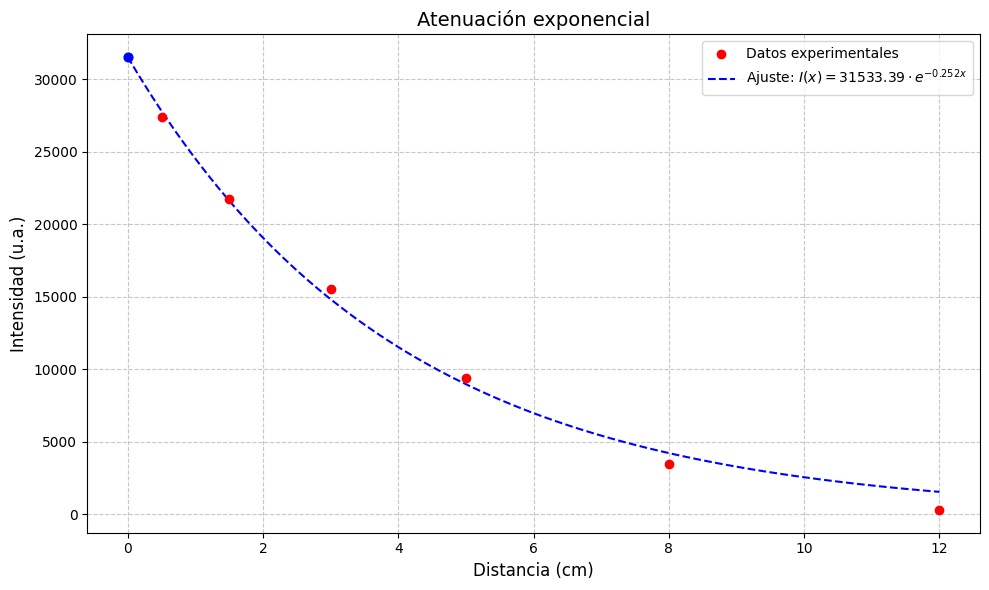

In [ ]:
X = np.array([0.5, 1.5, 3.0, 5.0, 8.0, 12.0])
I = np.array([AreaGauss_5mm, AreaGauss_15mm, AreaGauss_30mm, AreaGauss_50mm, AreaGauss_80mm, AreaGauss_120mm])

#Función exponencial:
def exponential_decay(x, I0, mu):
    return I0 * np.exp(-mu * x)

#Ajuste de curva
params, cov = curve_fit(exponential_decay, X, I, p0=[I[0], 0.1])
I0_fit, mu_fit = params
I0_err, mu_err = np.sqrt(np.diag(cov))
I_at_0 = I0_fit
I_at_0_error = I0_err
plt.figure(figsize=(10, 6))
plt.scatter(X, I, color='red', label='Datos experimentales', zorder=5)
x_fit = np.linspace(0, max(X), 100)
plt.plot(x_fit, exponential_decay(x_fit, I0_fit, mu_fit),
         'b--', label=f'Ajuste: $I(x) = {I0_fit:.2f} \cdot e^{{-{mu_fit:.3f}x}}$')
plt.scatter(0, I_at_0, color='blue', marker='o', s=40, zorder=10)
plt.title('Atenuación exponencial', fontsize=14)
plt.xlabel('Distancia (cm)', fontsize=12)
plt.ylabel('Intensidad (u.a.)', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Resultados numéricos
print("\n" + "="*50)
print("Resultados de la extrapolación:")
print(f"- Valor extrapolado en X=0 cm (I0): {I_at_0:.2f} ± {I_at_0_error:.2f} u.a.")
print(f"- Coeficiente de atenuación lineal (μ): {mu_fit:.3f} ± {mu_err:.3f} cm⁻¹")
print("="*50 + "\n")

plt.show()

In [ ]:
import numpy as np
from tabulate import tabulate

#Parámetros obtenidos del ajuste exponencial:
mu_fit = 0.252
mu_err = 0.015
# Energía inicial:
energy_keV = 662

# Datos de NIST para 662 keV (https://physics.nist.gov/PhysRefData/XrayMassCoef/tab3.html)
materials = {
    "Plomo (Pb)": {"mu/rho": 0.115, "rho": 11.34},
    "Aluminio (Al)": {"mu/rho": 0.0735, "rho": 2.70},
    "Hierro (Fe)": {"mu/rho": 0.0746, "rho": 7.87},
    "Concreto": {"mu/rho": 0.0645, "rho": 2.30},
    "Agua (H2O)": {"mu/rho": 0.0856, "rho": 1.00}
}

#Calcular mu teórico para cada material y comparar con el experimental:
results = []
for name, props in materials.items():
    mu_theoretical = props["mu/rho"] * props["rho"]
    discrepancy = abs(mu_fit - mu_theoretical) / mu_err
    results.append([name, mu_theoretical, discrepancy])
results.sort(key=lambda x: x[2])

#Resultados
print(f"Coeficiente de atenuación lineal (μ experimental): {mu_fit:.3f} ± {mu_err:.3f} cm⁻¹")
print("="*50 + "\n")
headers = ["Material", "μ teórico (cm⁻¹)", "Discrepancia (σ)"]
print(tabulate(results, headers=headers, floatfmt=".3f"))
best_match = results[0]
print(f"\nMaterial más probable: {best_match[0]} (μ = {best_match[1]:.3f} cm⁻¹)")
print(f"Discrepancia: {best_match[2]:.2f}σ respecto al μ experimental")

Coeficiente de atenuación lineal (μ experimental): 0.252 ± 0.015 cm⁻¹

Material         μ teórico (cm⁻¹)    Discrepancia (σ)
-------------  ------------------  ------------------
Aluminio (Al)               0.198               3.570
Concreto                    0.148               6.910
Agua (H2O)                  0.086              11.093
Hierro (Fe)                 0.587              22.340
Plomo (Pb)                  1.304              70.140

Material más probable: Aluminio (Al) (μ = 0.198 cm⁻¹)
Discrepancia: 3.57σ respecto al μ experimental
